In [1]:
## import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv("datasets/Ads_CTR_Optimisation.csv")

In [4]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
#implement thompson sampling

In [14]:
import random
N = 1000
d = 10

#step1

ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d

tot_rewards = 0

for n in range(0,N):
    
    ad = 0
    max_random = 0
    
    for i in range(0,d):
        
        #step 2
        random_draw = random.betavariate(number_of_rewards_0[i]+1 , number_of_rewards_1[i]+1)
        
        if random_draw > max_random:
            max_random = random_draw
            ad = i
    
    ads_selected.append(ad)
    
    reward = data.values[n,ad]
    
    if reward == 1:
        number_of_rewards_1[ad]=number_of_rewards_1[ad]+1
    
    else:
        number_of_rewards_0[ad]=number_of_rewards_0[ad]+1
    
    tot_rewards = tot_rewards+reward

In [7]:
## visualize the result

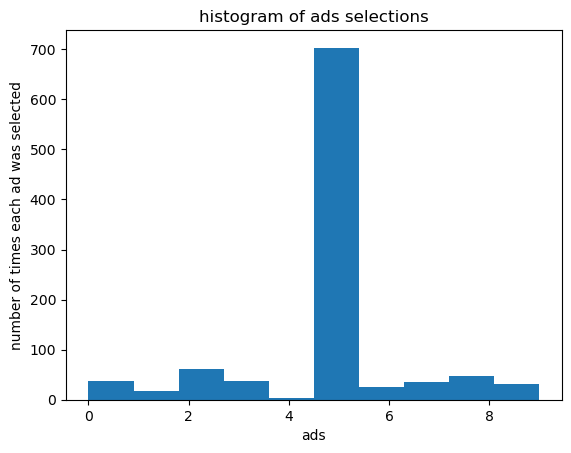

In [15]:
plt.hist(ads_selected)
plt.title("histogram of ads selections")
plt.xlabel("ads")
plt.ylabel("number of times each ad was selected")
plt.show()